# Arbres et parcours

Il est possible de retrouver la topologie exacte d'un arbre binaire à partir de deux de ses parcours parmi les trois parcours en profondeur 

* pré-ordonné
* symétrique
* post-ordonné

En effet, ces parcours nous donnent des renseignements complémentaires. Pour un arbre de racine `R`, 

* le pré-ordonné liste `R`, `R.gauche`, le sous-arbre de `R.gauche`, `R.droite`, le sous arbre de `R.droite`


* le symétrique liste le sous-arbre de `R.gauche` y compris `R.gauche`, la racine `R`, le sous-arbre de `R.droite` y compris `R.droite`


* le post-ordonné liste le sous-arbre de `R.gauche`, `R.gauche`, le sous arbre de `R.droite`, `R.droite` et enfin `R`

Recouper ces informations nous permet de reconstruire l'arbre

Considérons l'arbre suivant

In [1]:
class Noeud:
    def __init__(self,val):
        self.etiquette = val
        self.gauche = None
        self.droite = None
        
    def __str__(self): 
        return self.etiquette.__str__()

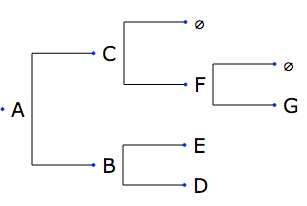

In [2]:
racine  = a = Noeud('A')
a.gauche = b = Noeud('B'); a.droite = c = Noeud('C')
b.gauche = d = Noeud('D'); b.droite = e = Noeud('E')
c.gauche = f = Noeud('F'); f.gauche = g = Noeud('G')

import include.helpers as h
h.afficher_arbre_binaire(racine)

Les fonctions suivantes nous donnent les parcours sous forme de liste

In [3]:
def preordonne(R):
    if R:
        p = [ R.etiquette ]
        p.extend( preordonne(R.gauche))
        p.extend( preordonne(R.droite))
        return p
    else:
        return [ ] 
    
pre = preordonne(racine); print(pre)

['A', 'B', 'D', 'E', 'C', 'F', 'G']


In [4]:
def symetrique(R):
    if R:
        p = symetrique(R.gauche)
        p.append(R.etiquette)
        p.extend( symetrique(R.droite))
        return p
    else:
        return [ ] 
    
sym = symetrique(racine); print(sym)

['D', 'B', 'E', 'A', 'G', 'F', 'C']


In [5]:
def postordonne(R):
    if R:
        p = postordonne(R.gauche)
        p.extend( postordonne(R.droite))
        p.append( R.etiquette )
        return p
    else:
        return [ ] 

post = postordonne(racine); print(post)

['D', 'E', 'B', 'G', 'F', 'C', 'A']


In [6]:
# Reconstruisons l'arbre à partir de ses parcours pré-ordonné et symétrique
print(pre); print(sym)

['A', 'B', 'D', 'E', 'C', 'F', 'G']
['D', 'B', 'E', 'A', 'G', 'F', 'C']


In [7]:
# Le parcours pré-ordonné nous donne la racine
etiquette_racine = pre[0]; print("Racine: ",etiquette_racine)

Racine:  A


In [8]:
# La position de la racine dans le parcours symétrique nous donne les 2 sous arbres
p = sym.index(etiquette_racine)
print("R.gauche: pre =",pre[1:p+1],", sym =",sym[0:p])
print("R.droite: pre =",pre[p+1:],", sym =",sym[p+1:])

R.gauche: pre = ['B', 'D', 'E'] , sym = ['D', 'B', 'E']
R.droite: pre = ['C', 'F', 'G'] , sym = ['G', 'F', 'C']


il suffit de refaire le même raisonnement pour les sous-arbres jusqu'à obtenir un parcours de 0 ou 1 élément

L'algorithme récursif s'écrit

In [9]:
def arbre_depuis_parcours(pre,sym):
    assert(len(pre) == len(sym))
    
    if len(pre) == 0:
        return None
    
    position_racine_dans_pre = 0
    etiquette_racine = pre[position_racine_dans_pre]
    i = position_racine_dans_sym = sym.index(etiquette_racine)
    
    R = Noeud(pre[0])
    R.gauche = arbre_depuis_parcours( pre[1:i+1], sym[0:i] )
    R.droite = arbre_depuis_parcours( pre[i+1:], sym[i+1:] )
    return R

['A', 'B', 'D', 'E', 'C', 'F', 'G']
['D', 'B', 'E', 'A', 'G', 'F', 'C']


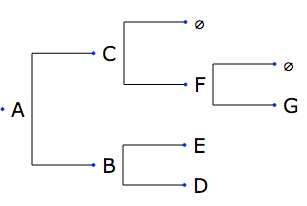

In [10]:
print(pre); print(sym)
R = arbre_depuis_parcours(pre,sym)
h.afficher_arbre_binaire(R)

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>